In [21]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd 
import numpy as np
from IPython.display import display
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
import os

In [22]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [23]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels    

In [24]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [25]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [26]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [42]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [43]:
print(train['image'])

0              images/train\angry\0.jpg
1              images/train\angry\1.jpg
2             images/train\angry\10.jpg
3          images/train\angry\10002.jpg
4          images/train\angry\10016.jpg
                      ...              
28816    images/train\surprise\9969.jpg
28817    images/train\surprise\9985.jpg
28818    images/train\surprise\9990.jpg
28819    images/train\surprise\9992.jpg
28820    images/train\surprise\9996.jpg
Name: image, Length: 28821, dtype: object


In [28]:
from tqdm.notebook import tqdm

In [33]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode = "grayscale" )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [34]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [35]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [37]:
x_train = train_features/255.0
x_test = test_features/255.0

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [40]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [41]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu' , input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

#fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

#output layer
model.add(Dense(7,activation='softmax'))


In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [19]:
model.fit(x=x_train,y=y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
226/226 [==============================] - 447s 2s/step - loss: 1.8224 - accuracy: 0.2439 - val_loss: 1.8091 - val_accuracy: 0.2614
Epoch 2/100
226/226 [==============================] - 843s 4s/step - loss: 1.7996 - accuracy: 0.2517 - val_loss: 1.7706 - val_accuracy: 0.2621
Epoch 3/100
226/226 [==============================] - 436s 2s/step - loss: 1.7028 - accuracy: 0.3063 - val_loss: 1.6359 - val_accuracy: 0.3389
Epoch 4/100
226/226 [==============================] - 963s 4s/step - loss: 1.5745 - accuracy: 0.3808 - val_loss: 1.4441 - val_accuracy: 0.4584
Epoch 5/100
226/226 [==============================] - 439s 2s/step - loss: 1.4852 - accuracy: 0.4235 - val_loss: 1.3768 - val_accuracy: 0.4750
Epoch 6/100
226/226 [==============================] - 439s 2s/step - loss: 1.4256 - accuracy: 0.4513 - val_loss: 1.3041 - val_accuracy: 0.4986
Epoch 7/100
226/226 [==============================] - 439s 2s/step - loss: 1.3966 - accuracy: 0.4628 - val_loss: 1.2652 - val_accuracy:

KeyboardInterrupt: 

In [39]:
model_json = model.to_json()
with open("emotiondetector.json", "w") as json_file:
    json_file.write(model_json)
model.save("emotiondetector.keras")    

In [40]:
from keras.models import model_from_json

In [41]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.keras")

In [42]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [43]:
def ef(image):
    img = load_img(image,"grayscale" = True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [49]:
images = 'images/train/sad/89.jpg'
print("original image is of sad")
img = ef(images)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print ("model prediction is ", pred_label)

original image is of sad
1/1 [==============================] - 0s 47ms/step
model prediction is  sad


In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of angry
1/1 [==============================] - 0s 52ms/step
model prediction is  angry


C:\Users\Shruti\Appdata\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


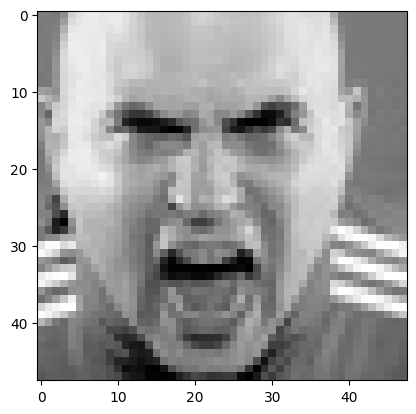

In [51]:
image = 'images/train/angry/22.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print ("model prediction is ", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [52]:
import cv2